## 10.4 상호정보량

이 절에서는 상관계수를 대체할 수 있는 확률변수 특성인 상호정보량에 대해 공부한다. 

### 상호정보량

두 확률변수 $X, Y$가 독립이면 정의에 의해 결합확률밀도함수는 주변확률밀도함수의 곱과 같다.

$$
\begin{align}
p(x, y) = p(x)p(y)
\tag{10.4.1}
\end{align}
$$ 

쿨벡-라이블러 발산은 두 확률분포가 얼마나 다른지를 정량적으로 나타내는 수치다. 두 확률분포가 같으면 쿨벡-라이블러 발산은 0이 되고 다르면 다를수록 큰 값을 가진다. 

$$ 
\begin{align}
KL(p||q) = \sum_{i=1}^{K} p(y_i) \log_2 \left(\dfrac{p(y_i)}{q(y_i)}\right)
\tag{10.4.2}
\end{align}
$$


**상호정보량(mutual information)**은 결합확률밀도함수 $p(x,y)$와 주변확률밀도함수의 곱 $p(x)p(y)$의 쿨벡-라이블러 발산이다. 즉 결합확률밀도함수와 주변확률밀도함수의 차이를 측정하므로써 두 확률변수의 상관관계를 측정하는 방법이다. 만약 두 확률변수가 독립이면 결합확률밀도함수는 주변확률밀도함수의 곱과 같으므로 상호정보량은 0이 된다. 반대로 상관관계가 있다면 그만큼 양의 상호정보량을 가진다.

$$
\begin{align}
MI[X,Y] = KL\big(p(x,y)||p(x)p(y)\big)
= \sum_{i=1}^{K} p(x_i,y_i) \log_2 \left(\dfrac{p(x_i,y_i)}{p(x_i)p(y_i)}\right)
\tag{10.4.3}
\end{align}
$$

상호정보량은 엔트로피와 조건부엔트로피의 차이와 같다.

$$
\begin{align}
MI[X,Y] = H[X] - H[X|Y]
\tag{10.4.4}
\end{align}
$$

또는

$$
\begin{align}
MI[X,Y] = H[Y] - H[Y|X]
\tag{10.4.5}
\end{align}
$$

조건부엔트로피는 두 확률변수의 상관관계가 강할수록 원래의 엔트로피보다 더 작아지므로 상호정보량이 커진다.

### 이산확률변수의 상호정보량

상관관계가 있는 두 개의 카테고리 확률변수 $X, Y$에서 나온 표본 데이터 $N$개가 있다. 이 데이터를 이용하여 두 이산확률변수의 상호정보량을 추정하려면 우선 다음과 같은 기호를 정의해야 한다.

* $I$: $X$의 카테고리 개수 
* $J$: $Y$의 카테고리 개수 
* $N_i$: $X=i$인 데이터의 개수
* $N_j$: $Y=j$인 데이터의 개수
* $N_{ij}$: $X=i,Y=j$인 데이터의 개수

이 때 확률밀도함수는 다음과 같이 추정할 수 있다.

$$
\begin{align}
p_X(i) = \dfrac{N_i}{N}
\tag{10.4.6}
\end{align}
$$

$$
\begin{align}
p_Y(j) = \dfrac{N_j}{N}
\tag{10.4.7}
\end{align}
$$

$$
\begin{align}
p_{XY}(i,j) = \dfrac{N_{ij}}{N}
\tag{10.4.8}
\end{align}
$$

이를 대입하면 상호정보량은 다음처럼 나온다.

$$
\begin{align}
MI[X,Y] 
= \sum_{i=1}^{I} \sum_{j=1}^{J} \dfrac{N_{ij}}{N} \log_2 \left(\dfrac{N N_{ij}}{N_iN_j}\right) 
\tag{10.4.9}
\end{align}
$$

사이킷런 패키지의 metrics 서브패키지는 이산확률변수의 상호정보량을 구하는 `mutual_info_score` 명령을 제공한다. `mutual_info_score` 명령은 각 데이터에 대해서 $X, Y$ 카테고리값을 표시한 2차원 배열을 입력해야 한다.

다음은 사이킷런 패키지에서 제공하는 문서 카테고리 분류문제 데이터다. 이중 'rec.autos', 'sci.med', 'rec.sport.baseball' 세 클래스의 문서에 대해 키워드 빈도와 카테고리 사이의 상호정보량을 계산하면 다음과 같다.

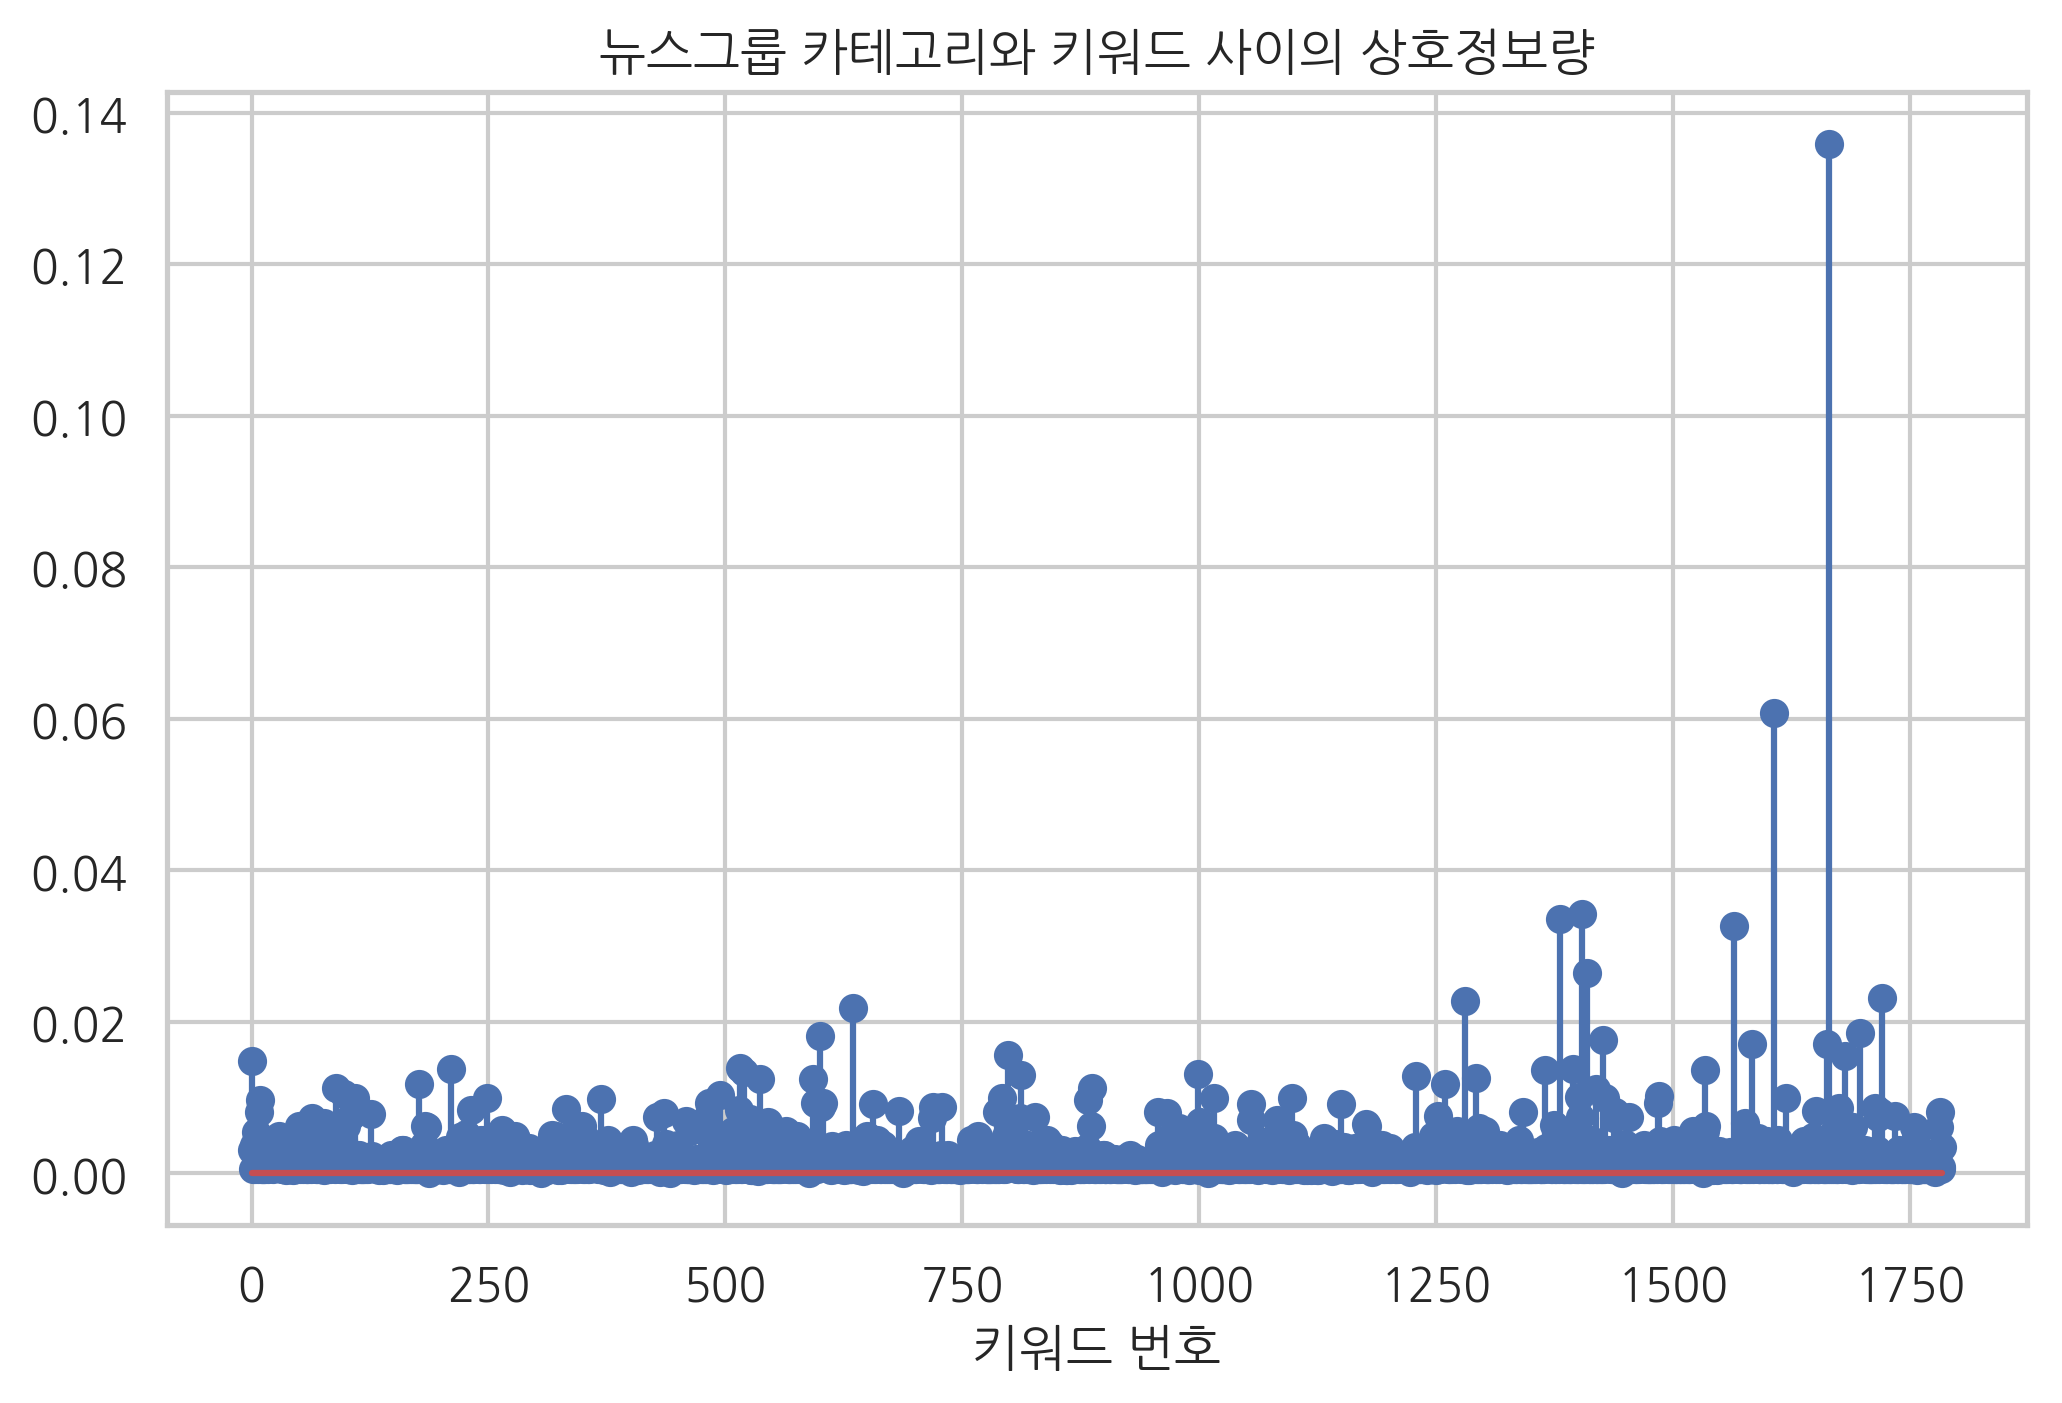

In [1]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import mutual_info_score

categories = ['rec.autos', 'sci.med', 'rec.sport.baseball']
newsgroups = fetch_20newsgroups(subset='train', categories=categories)
vect = CountVectorizer(stop_words="english", token_pattern="[a-zA-Z]+")
X = vect.fit_transform(newsgroups.data).toarray()
y = newsgroups.target

mi = np.array([mutual_info_score(X[:, i], y) for i in range(X.shape[0])])
plt.stem(mi)
plt.title("뉴스그룹 카테고리와 키워드 사이의 상호정보량")
plt.xlabel("키워드 번호")
plt.show()

가장 상호정보량이 큰 10개의 키워드는 다음과 같다.

In [2]:
inv_vocabulary = {v: k for k, v in vect.vocabulary_.items()}
idx = np.flip(np.argsort(mi))
[inv_vocabulary[idx[i]] for i in range(10)]

['baseball',
 'banks',
 'automotive',
 'auto',
 'ball',
 'autos',
 'batting',
 'atlanta',
 'alomar',
 'bat']

### 최대정보 상관계수

연속확률변수의 표본 데이터에서 상호정보량을 측정하려면 우선 확률분포함수를 알아야한다. 확률분포함수는 보통 히스토그램을 사용하여 유한개의 구간(bin)으로 나누어 추정하게되는데 이 때 구간의 갯수나 경계 위치에 따라 추정오차가 커질 수 있다. 따라서 구간을 나누는 방법을 다양하게 시도한 다음에 그 결과로 구한 다양한  상호정보량 중에서 가장 큰 값을 선택하여 정규화한 것을 **최대정보 상관계수(maximal information coefficient, MIC)**라고 한다

minepy 패키지를 사용하면 최대정보 상관계수를 구할 수 있다. 다음은 선형상관계수(피어슨 상관계수)로 0이 나오지만 비선형적인 상관관계를 가지는 데이터들에 대해 최대정보 상관계수를 구한 결과다.

minepy 패키지는 conda 패키지 매니저로 설치할 수 있다.

```
conda install minepy
```

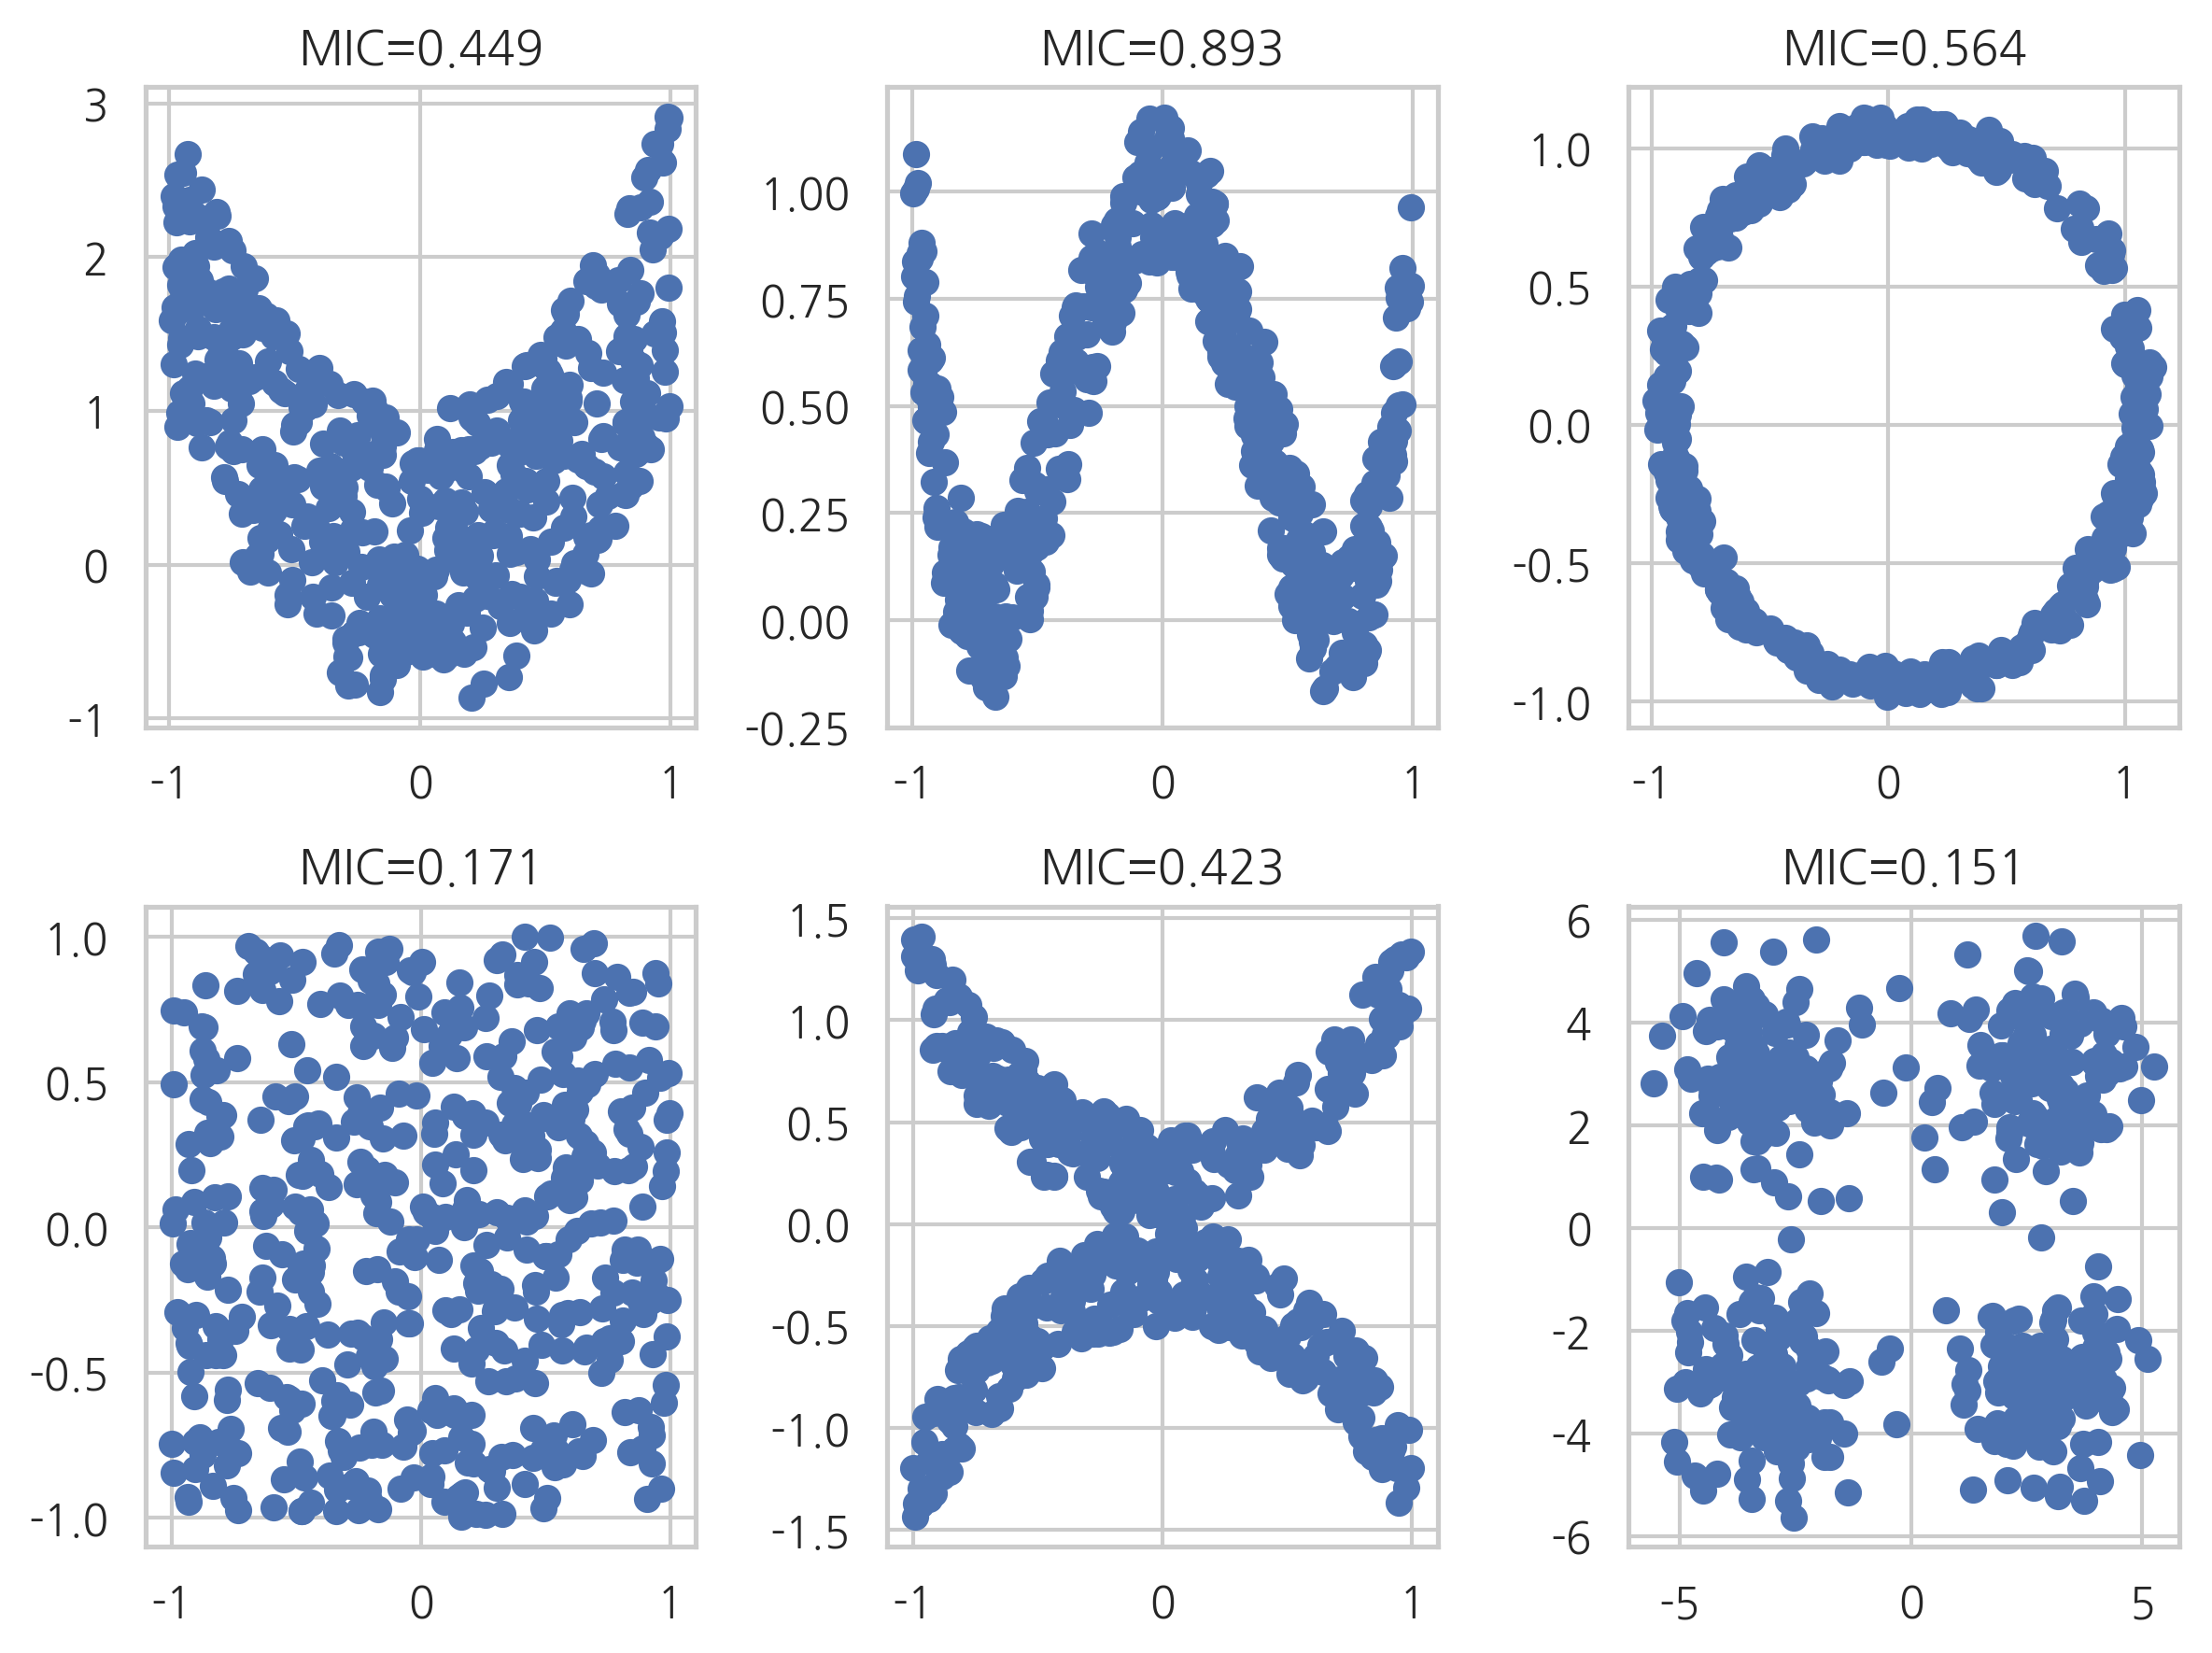

In [3]:
from minepy import MINE

mine = MINE()

n = 500

plt.figure(figsize=(8, 6))

plt.subplot(231)
x1 = np.random.uniform(-1, 1, n)
y1 = 2*x1**2 + np.random.uniform(-1, 1, n)
plt.scatter(x1, y1)
mine.compute_score(x1, y1)
plt.title("MIC={0:0.3f}".format(mine.mic()))

plt.subplot(232)
x2 = np.random.uniform(-1, 1, n)
y2 = 4*(x2**2-0.5)**2 + np.random.uniform(-1, 1, n)/5
plt.scatter(x2, y2)
mine.compute_score(x2, y2)
plt.title("MIC={0:0.3f}".format(mine.mic()))

plt.subplot(233)
x3 = np.random.uniform(-1, 1, n)
y3 = np.cos(x3 * np.pi) + np.random.uniform(0, 1/8, n)
x3 = np.sin(x3 * np.pi) + np.random.uniform(0, 1/8, n)
plt.scatter(x3, y3)
mine.compute_score(x3, y3)
plt.title("MIC={0:0.3f}".format(mine.mic()))

plt.subplot(234)
x4 = np.random.uniform(-1, 1, n)
y4 = np.random.uniform(-1, 1, n)
plt.scatter(x4, y4)
mine.compute_score(x4, y4)
plt.title("MIC={0:0.3f}".format(mine.mic()))

plt.subplot(235)
x5 = np.random.uniform(-1, 1, n)
y5 = (x5**2 + np.random.uniform(0, 0.5, n)) * np.array([-1, 1])[np.random.random_integers(0, 1, size=n)]
plt.scatter(x5, y5)
mine.compute_score(x5, y5)
plt.title("MIC={0:0.3f}".format(mine.mic()))

plt.subplot(236)
xy1 = np.random.multivariate_normal([3, 3], [[1, 0], [0, 1]], int(n/4))
xy2 = np.random.multivariate_normal([-3, 3], [[1, 0], [0, 1]], int(n/4))
xy3 = np.random.multivariate_normal([-3, -3], [[1, 0], [0, 1]], int(n/4))
xy4 = np.random.multivariate_normal([3, -3], [[1, 0], [0, 1]], int(n/4))
xy = np.concatenate((xy1, xy2, xy3, xy4), axis=0)
x6 = xy[:, 0]
y6 = xy[:, 1]
plt.scatter(x6, y6)
mine.compute_score(x6, y6)
plt.title("MIC={0:0.3f}".format(mine.mic()))

plt.tight_layout()
plt.show()